In [138]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, t, gamma, poisson
import scipy.stats
import scipy.integrate as integrate

0.5638633808516628
0.4361366191483371


[]

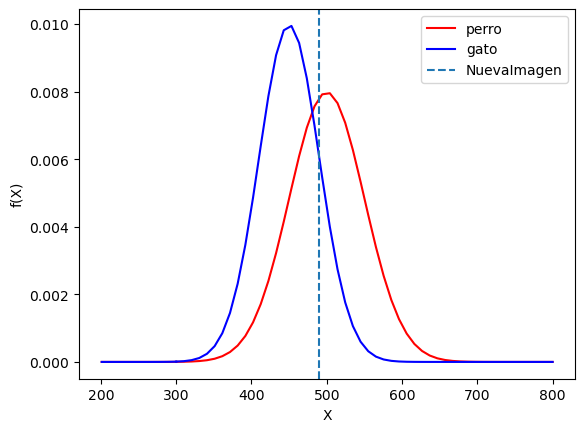

In [139]:
mu1, mu2 = 500, 450
sigma1, sigma2 = 50, 40

perro_marg = 0.5
gato_marg  = 1-perro_marg
perro = norm(mu1, sigma1)
gato  = norm(mu2 ,sigma2)

k = 490

fx = perro_marg*perro.pdf(k) + gato_marg*gato.pdf(k)

p_perro = perro.pdf(k)*perro_marg/fx
p_gato = gato.pdf(k)*gato_marg/fx


print(p_perro)
print(p_gato)

X = np.linspace(min(mu1,mu2) - 3*max(sigma1,sigma2),(max(mu1,mu2) + 6*max(sigma1,sigma2),201))
plt.plot(X, perro.pdf(X), color='r', label='perro')
plt.plot(X, gato.pdf(X), color= 'b', label='gato')
plt.axvline(k, linestyle='--', label='NuevaImagen')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.xlabel("X")
plt.ylabel("f(X)")
plt.plot()

In [140]:
t.ppf(0.95, df=49)

1.6765508919142629

In [141]:
np.sqrt(50)*1.5

10.606601717798213

In [142]:
(6.5-6)/(1.5/np.sqrt(50))

2.3570226039551585

10.0
11.142857142857142
11.333333333333334
68


[]

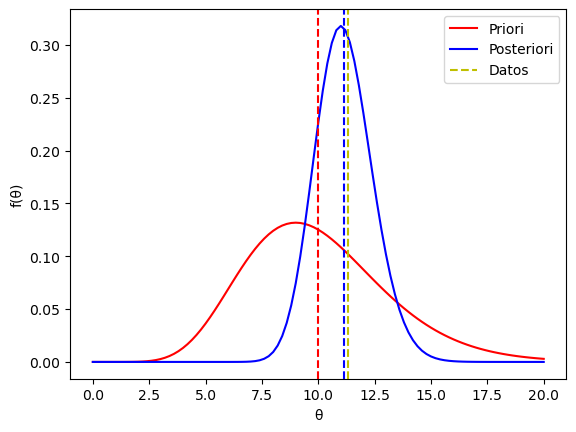

In [143]:


datos = np.array([20, 5, 6, 30, 2, 5])

n = len(datos)
media_datos = datos.mean()
sum_datos = datos.sum()

a1, b1 = 10, 1
a2, b2 = sum_datos + a1, n + b1
media1 = a1/b1
media2 = a2/b2

print(media1)
print(media2)
print(media_datos)
print(sum_datos)

pois_datos = poisson(media_datos)
priori = gamma(a=a1,scale=1/b1)
posteriori = gamma(a=a2,scale=1/b2)
X = np.linspace(0, 20, 101)
plt.plot(X, priori.pdf(X), color='r', label='Priori')
plt.plot(X, posteriori.pdf(X), color='b', label='Posteriori')
# plt.bar(X, pois_datos.pmf(X), color='y', label='pois_datos')
# plt.bar(datos, 1, color='y', label='Datos')
plt.axvline(media1, color='r', linestyle='--')
plt.axvline(media2, color='b', linestyle='--')
plt.axvline(media_datos, color='y', linestyle='--', label='Datos')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.xlabel("θ")
plt.ylabel("f(θ)")
plt.plot()

In [144]:
datos = np.array([20, 5, 6, 30, 2, 5])
datos.sum()
datos.mean()

11.333333333333334

2.0
2.12
2.1194029850746268


[]

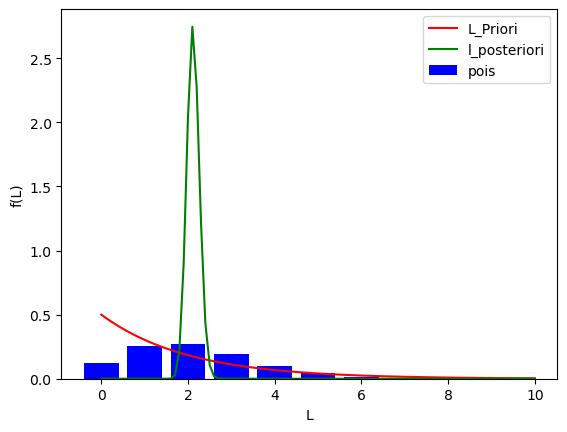

In [145]:
a, b = 1, 1/2
a1, b1 = 213, 100.5
l_priori = scipy.stats.gamma(a=a, scale=1/b)
l_posteriori = scipy.stats.gamma(a=a1,scale=1/b1)
pois = poisson(212/100)
X = np.linspace(0, 10, 101)
Y = np.arange(8)
print(l_priori.mean())
print(212/100)
print(l_posteriori.mean())

plt.plot(X, l_priori.pdf(X), color='r', label='L_Priori')
plt.plot(X, l_posteriori.pdf(X), color='g', label='l_posteriori')
plt.bar(Y, pois.pmf(Y), color='b', label='pois')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.xlabel("L")
plt.ylabel("f(L)")
plt.plot()

In [146]:
import math

In [147]:
def funcion(x, t):
    cte = np.power(7,78)/(math.gamma(78)*math.factorial(x))
    return cte*np.power(t,77+x)*np.exp(-8*t)

funcion(1,1)

3.1598829997038203e-108

In [148]:
np.power(7,78)/(math.gamma(78)*math.factorial(4))

3.9247826942018657e-106

In [149]:
X = np.linspace(0,30,31).astype(int)

suma = 0
for x in X:
    integral = integrate.quad(lambda tita: funcion(x=x, t=tita),0,np.inf)[0]
    suma += integral
suma

4.550816310214614e-58